In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.model_selection import train_test_split
import re


In [67]:
df = pd.read_csv('hyderabad_first_type_000.csv')
df.head()

,Price,Carpet Area,Bedrooms,Builder,Paid User,Locality,Property Type,User Type,Prime Location,Agent,Link,Prop ID,Other
0,49.3 Lac,N,2,ELV Projects Private Limited,Y,Adibatla,Apartment,Builder,Y,RANJITH DORA,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54364457,***super area*1285 sqft*****transaction*New Pr...
1,79.9 Lac,NaN,2,NaN,Y,"Manikonda, Outer Ring Road",Apartment,Builder,Y,Pavan Kumar,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56459889,***super area*1268 sqft****status*Ready to Mov...
2,86.3 Lac,NaN,2,Silversand Infratech Pvt. Ltd,Y,Hitech City,Apartment,Builder,Y,Shegur,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54835677,***super area*1150 sqft****status*Ready to Mov...
3,40.9 Lac,N,2,NaN,Y,Aminpur,Apartment,Builder,Y,Kumaran A,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55539835,***super area*918 sqft****status**\t\t\t\t\t\t...
4,1.35 Cr,N,3,Sri Aditya Homes Pvt. Ltd.,Y,Shaikpet,Apartment,Builder,Y,Ranjani,https://www.magicbricks.com/propertyDetails/3-...,domcache_srp_50279054,***super area*1895 sqft****status**\t\t\t\t\t\...


Data Preprocessing


In [68]:
crore_prices_index = df[df['Price'].str.contains('Cr')].index
df.drop(crore_prices_index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Price,Carpet Area,Bedrooms,Builder,Paid User,Locality,Property Type,User Type,Prime Location,Agent,Link,Prop ID,Other
0,49.3 Lac,N,2,ELV Projects Private Limited,Y,Adibatla,Apartment,Builder,Y,RANJITH DORA,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54364457,***super area*1285 sqft*****transaction*New Pr...
1,79.9 Lac,NaN,2,NaN,Y,"Manikonda, Outer Ring Road",Apartment,Builder,Y,Pavan Kumar,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56459889,***super area*1268 sqft****status*Ready to Mov...
2,86.3 Lac,NaN,2,Silversand Infratech Pvt. Ltd,Y,Hitech City,Apartment,Builder,Y,Shegur,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54835677,***super area*1150 sqft****status*Ready to Mov...
3,40.9 Lac,N,2,NaN,Y,Aminpur,Apartment,Builder,Y,Kumaran A,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55539835,***super area*918 sqft****status**\t\t\t\t\t\t...
4,78.4 Lac,N,2,BEL,Y,Moti Nagar,Apartment,Builder,Y,Brigade,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56379877,***super area*1174 sqft****status**\t\t\t\t\t\...


In [69]:
pattern = r'(\d+)-Sq-ft'
df['Sqft'] = df['Link'].str.extract(pattern)
pattern = r'(\d+)'
df['Price'] = df['Price'].str.extract(pattern)
df.head()


,Price,Carpet Area,Bedrooms,Builder,Paid User,Locality,Property Type,User Type,Prime Location,Agent,Link,Prop ID,Other,Sqft
0,49,N,2,ELV Projects Private Limited,Y,Adibatla,Apartment,Builder,Y,RANJITH DORA,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54364457,***super area*1285 sqft*****transaction*New Pr...,1285
1,79,NaN,2,NaN,Y,"Manikonda, Outer Ring Road",Apartment,Builder,Y,Pavan Kumar,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56459889,***super area*1268 sqft****status*Ready to Mov...,1268
2,86,NaN,2,Silversand Infratech Pvt. Ltd,Y,Hitech City,Apartment,Builder,Y,Shegur,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54835677,***super area*1150 sqft****status*Ready to Mov...,1150
3,40,N,2,NaN,Y,Aminpur,Apartment,Builder,Y,Kumaran A,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55539835,***super area*918 sqft****status**\t\t\t\t\t\t...,918
4,78,N,2,BEL,Y,Moti Nagar,Apartment,Builder,Y,Brigade,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56379877,***super area*1174 sqft****status**\t\t\t\t\t\...,1174


In [70]:
df.drop(columns=["Agent","Prime Location","Paid User","Carpet Area"], inplace=True)
df.drop(columns=["User Type","Link","Prop ID"], inplace=True)
df.drop(columns=["Other"], inplace=True)
df.head()


,Price,Bedrooms,Builder,Locality,Property Type,Sqft
0,49,2,ELV Projects Private Limited,Adibatla,Apartment,1285
1,79,2,NaN,"Manikonda, Outer Ring Road",Apartment,1268
2,86,2,Silversand Infratech Pvt. Ltd,Hitech City,Apartment,1150
3,40,2,NaN,Aminpur,Apartment,918
4,78,2,BEL,Moti Nagar,Apartment,1174


In [71]:
df.drop(columns=["Builder","Property Type","Bedrooms"], inplace=True)
df.head()

,Price,Locality,Sqft
0,49,Adibatla,1285
1,79,"Manikonda, Outer Ring Road",1268
2,86,Hitech City,1150
3,40,Aminpur,918
4,78,Moti Nagar,1174


In [72]:
df.isnull().sum()

Price        0
Locality    89
Sqft        76
dtype: int64

In [73]:
df.dropna(inplace=True)
df.isnull().sum()

Price       0
Locality    0
Sqft        0
dtype: int64

In [74]:
df.shape

(1711, 3)

In [75]:
df['Locality'].value_counts()

Locality
Bachupally                    57
Miyapur, NH  9                54
Kompally                      47
Nizampet                      42
Pragathi Nagar, Kukatpally    41
                              ..
Anand Nagar                    1
Vinayaka Nagar                 1
Vishali Nagar                  1
Bharat Nagar, Moosapet         1
Officers Colony                1
Name: count, Length: 463, dtype: int64

In [76]:
indices=[]
vc=df['Locality'].value_counts()
vals =[]
for i,v in vc.items():
  if v>=47:
    indices.append(i)
    vals.append(v)
print(vals)
print(indices)

[57, 54, 47]
['Bachupally', 'Miyapur, NH  9', 'Kompally']


([0, 1, 2],
 [Text(0, 0, 'Bachupally'),
  Text(1, 0, 'Miyapur, NH  9'),
  Text(2, 0, 'Kompally')])

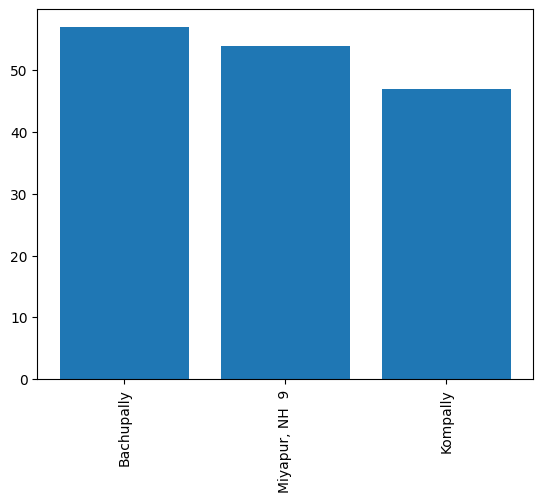

In [77]:
plt.bar(indices,vals)
plt.xticks(rotation=90)

In [78]:
new_df = df[df['Locality'].isin(indices)]
#selecting top 3 most popular locations only

In [79]:
new_df.isnull().sum()

Price       0
Locality    0
Sqft        0
dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [81]:
enc = LabelEncoder()
new_df['Locality'] = enc.fit_transform(new_df['Locality'])

C:\Users\divya\AppData\Local\Temp\ipykernel_8452\3028564913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Locality'] = enc.fit_transform(new_df['Locality'])


In [82]:
new_df['Locality'].value_counts()

Locality
0    57
2    54
1    47
Name: count, dtype: int64

In [83]:
new_df.sample(5)

,Price,Locality,Sqft
38,60,0,1099
1114,89,0,2084
987,51,2,1080
1672,56,1,1334
820,45,1,842


In [84]:
# ss = StandardScaler()
# new_df['Sqft'] = ss.fit_transform(new_df[['Sqft']])
# new_df['Price'] = ss.fit_transform(new_df[['Price']])


In [85]:
new_df.shape


(158, 3)

In [86]:
new_df.sample(5)

,Price,Locality,Sqft
65,70,1,1400
914,59,1,1352
1036,59,0,1449
1355,80,2,1193
71,84,0,1617


In [87]:
new_df['Locality'].value_counts()

Locality
0    57
2    54
1    47
Name: count, dtype: int64

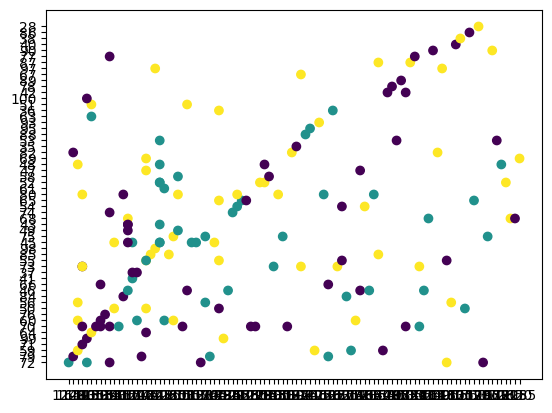

In [88]:
plt.scatter(new_df['Sqft'], new_df['Price'], c=new_df['Locality'],cmap='viridis')

Training Decision Tree Model

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [90]:
new_df['Sqft'] = pd.to_numeric(new_df['Sqft'], errors='coerce')
new_df['Price'] = pd.to_numeric(new_df['Price'], errors='coerce')


C:\Users\divya\AppData\Local\Temp\ipykernel_8452\60610952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Sqft'] = pd.to_numeric(new_df['Sqft'], errors='coerce')
C:\Users\divya\AppData\Local\Temp\ipykernel_8452\60610952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Price'] = pd.to_numeric(new_df['Price'], errors='coerce')


In [91]:
x_train, x_test, y_train, y_test = train_test_split(new_df.iloc[:,1:], new_df['Price'], test_size=0.2, random_state=43)

In [92]:
mod1 = DecisionTreeRegressor()
mod1.fit(x_train, y_train)

DecisionTreeRegressor()

In [93]:
y_pred = mod1.predict(x_test)

In [94]:
r2_score(y_pred,y_test)

0.6373618862872354

In [95]:
mean_squared_error(y_test, y_pred)

96.86371527777779

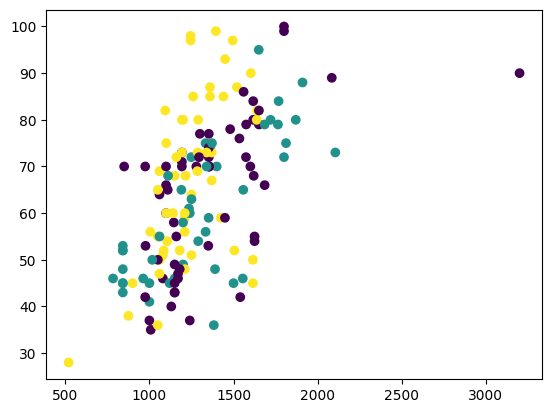

In [96]:
plt.scatter(new_df['Sqft'], new_df['Price'], c=new_df['Locality'],cmap='viridis')
# sqft_min, sqft_max = min(new_df['Sqft']), max(new_df['Sqft'])
# price_min, price_max = min(new_df['Price']), max(new_df['Price'])
# sqft_step = (sqft_max - sqft_min)/100 
# price_step = (price_max - price_min)/10 
# x = np.meshgrid(np.arange(sqft_min, sqft_max, sqft_step),np.arange(price_min, price_max, price_step))
# #predictions = mod1.predict(np.c_[x[0].ravel(), x[1].ravel()]).reshape(x[0].shape)
# plt.contourf(x[0], x[1], mod1.predict(np.c_[x[0].ravel(), x[1].ravel()]).reshape(x[0].shape), alpha=0.75, cmap='viridis')

# #plt.contourf(x[0], x[1], predictions, alpha=0.75, cmap='viridis')
# plt.show()
 

[Text(0.4706483644859813, 0.96875, 'Locality <= 1186.5\nsquared_error = 264.606\nsamples = 126\nvalue = 62.929'),
 Text(0.1582943925233645, 0.90625, 'Locality <= 1033.5\nsquared_error = 123.928\nsamples = 52\nvalue = 52.269'),
 Text(0.0397196261682243, 0.84375, 'Locality <= 652.0\nsquared_error = 85.882\nsamples = 17\nvalue = 46.0'),
 Text(0.030373831775700934, 0.78125, 'squared_error = 0.0\nsamples = 1\nvalue = 28.0'),
 Text(0.04906542056074766, 0.78125, 'Locality <= 862.5\nsquared_error = 69.734\nsamples = 16\nvalue = 47.125'),
 Text(0.030373831775700934, 0.71875, 'Locality <= 846.0\nsquared_error = 80.56\nsamples = 5\nvalue = 53.2'),
 Text(0.02102803738317757, 0.65625, 'Locality <= 813.0\nsquared_error = 12.5\nsamples = 4\nvalue = 49.0'),
 Text(0.011682242990654205, 0.59375, 'squared_error = 0.0\nsamples = 1\nvalue = 46.0'),
 Text(0.030373831775700934, 0.59375, 'squared_error = 12.667\nsamples = 3\nvalue = 50.0'),
 Text(0.0397196261682243, 0.65625, 'squared_error = 0.0\nsamples = 1\

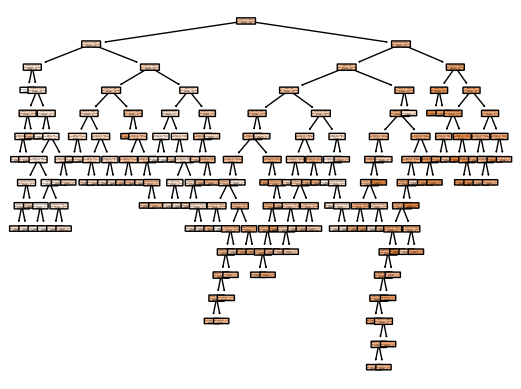

In [97]:
plot_tree(mod1, filled=True, feature_names=['Sqft', 'Locality'], rounded=True)


Saving the model

In [100]:
import pickle
saved_model = pickle.dumps(mod1)
with open('dectree_model.pkl', 'wb') as file:
    pickle.dump(mod1, file)
file.close()

In [104]:
x_train

,Locality,Sqft
84,0,1240
1841,2,1285
1084,1,1200
619,0,1600
367,2,900
...,...,...
535,2,1193
168,2,1440
500,0,1355
599,1,1812


In [108]:
mod1.predict([[0,2000]])

C:\Users\divya\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([89.])

In [99]:
y_pred

array([72.        , 73.66666667, 50.        , 60.        , 80.        ,
       73.66666667, 50.        , 85.        , 70.5       , 72.        ,
       45.        , 48.        , 99.        , 55.        , 98.        ,
       48.        , 48.        , 86.        , 65.        , 48.        ,
       60.        , 88.        , 50.        , 53.5       , 50.        ,
       65.5       , 82.        , 51.        , 82.        , 72.        ,
       84.        , 42.        ])